<a href="https://colab.research.google.com/github/valmirf/mineracao_textual/blob/main/Remo%C3%A7%C3%A3o_de_Fundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [41]:
import os
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:


#path = os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Dataset')   # Change according to your path 
path = os.path.join(os.getcwd())   # Change according to your path
os.chdir(path)
print('path: ' + path)
images_dataset = path + '/gdrive/Shareddrives/MEC - Correção textual/Visão Computacional/Datasets/Folha_Final'
print(images_dataset)


path: /content
/content/gdrive/Shareddrives/MEC - Correção textual/Visão Computacional/Datasets/Folha_Final


/content/gdrive/Shareddrives/MEC - Correção textual/Visão Computacional/Datasets/Folha_Final/IMG_20211220_093211.jpg
(4000, 2250, 3)


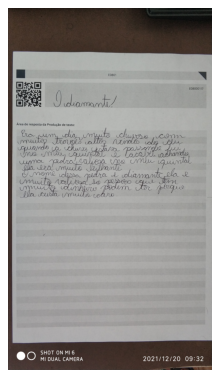

In [36]:
image_path = images_dataset + '/IMG_20211220_093211.jpg'
print(image_path)
img1 = cv2.imread(image_path)
print(img1.shape)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

#Detecção da Folha

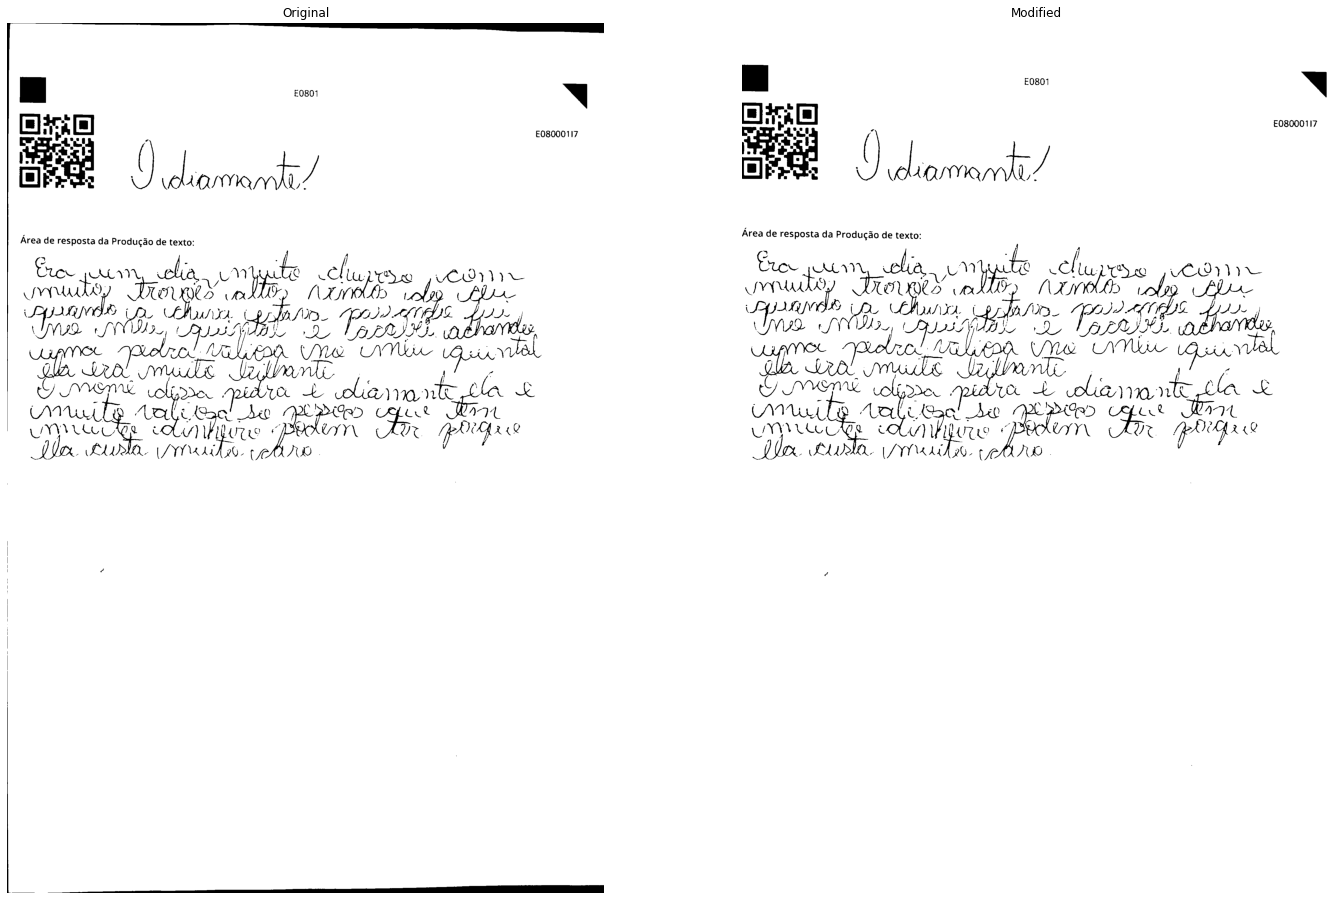

In [99]:
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_gaussian = cv2.GaussianBlur(gray,(3,3),0) 
thresh_adaptive = cv2.adaptiveThreshold(gray_gaussian,255,1,1,11,2)
thresh_otsu = cv2.threshold(gray_gaussian,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #OTSU
contours, hierarchy = cv2.findContours(thresh_otsu[1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a green 'nghien' rectangle
    cv2.drawContours(gray, [box], 0, (0, 255, 0),1)

#cv2_imshow(gray)



def biggestRectangle(contours):
    biggest = None
    max_area = 0
    indexReturn = -1
    for index in range(len(contours)):
            i = contours[index]
            area = cv2.contourArea(i)
            if area > 100:
                    peri = cv2.arcLength(i,True)
                    approx = cv2.approxPolyDP(i,0.1*peri,True)
                    if area > max_area: #and len(approx)==4:
                            biggest = approx
                            max_area = area
                            indexReturn = index
    return indexReturn

indexReturn = biggestRectangle(contours)
#img_paper1 = cv2.drawContours(gray_gaussian, contours, indexReturn, (0,255,0))
#cv2_imshow(img_paper1)


hull = cv2.convexHull(contours[indexReturn])
img_paper2 = cv2.drawContours(gray_gaussian, [hull], 0, (0,255,0),3)
#cv2_imshow(img_paper2)

x, y, w, h = cv2.boundingRect(hull)
img_crop_orig = thresh_otsu[1][y:(y+h),x:(x+w)]
#cv2_imshow(img_crop_orig)

#TOMAR CUIDADO COM ESSE LIMIAR ESCOLHIDO, POIS PODE SER INFLUENCIADO PELO TAMANHO DA IMAGEM
limiar_crop = 50
img_crop = thresh_otsu[1][y+limiar_crop:(y+h)-limiar_crop,x+limiar_crop:(x+w)-limiar_crop]
#cv2_imshow(img_crop)

images = [img_crop_orig,img_crop]
titles = ['Original','Modificado']
fig, axes = plt.subplots(1, 2, figsize=(24, 16))
ax = axes.ravel()
for i in range(2):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(titles[i])
    ax[i].set_axis_off()

cv2.waitKey(0)
cv2.destroyAllWindows()